# Deep Learning with Python
# Example 5.2 - Cats and Dogs ConvNet (Baseline)

## Making Directories

In [3]:
import os, shutil

In [13]:
# This is the directory where the uncompressed, original dataset is stored
original_dataset_dir = '/Users/saads/OneDrive/Desktop/DL-Python/chapter-5/dogs-vs-cats'

# This is the new directory where we will be storing the subset of the original dataset
base_dir = '/Users/saads/OneDrive/Desktop/DL-Python/chapter-5/cats_and_dogs_small'

In [49]:
# Have Python make a new directory at the path specified
os.mkdir(base_dir)

In [14]:
# Making directories for training, validation, and test splits
# Command `join` takes the base_dir path and adds a new folder to this path
# Train
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

# Test 
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [15]:
# Validation 
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

In [16]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

In [17]:
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [18]:
# Directory with validation cat picutres
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

In [19]:
# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [20]:
# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

In [21]:
# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [14]:
# Path to training set
train_set_dir = os.path.join(original_dataset_dir, 'train')

# Path to test set
test_set_dir = os.path.join(original_dataset_dir, 'test')

## Copying Files from the Data Set - Cats

In [69]:
# Copies the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [70]:
# Find every file with a name in fnames and copy to the right directory
for fname in fnames:
    src = os.path.join(train_set_dir, fname)  # source of copy operation
    dst = os.path.join(train_cats_dir, fname)       # destination of copy operation
    shutil.copyfile(src, dst)

In [73]:
# Copy the next 500 cat images to validation set 
fnames= ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(train_set_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    

In [74]:
# Copy the next 500 cat images to the test set
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

## Copying Files From Dataset - Dogs

In [75]:
# Copies the first 1000 dog images to training set for dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_set_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [76]:
# Copy next 500 dog images to the validation set's dog directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(train_set_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

In [77]:
# Copy the next 500 dog images to the test set's dog directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(train_set_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


## Sanity Check - Counting Pictures in Each Directory
We will count how many pictures are in each training split (tain/test/validation) directory using more functionality of the `os` module.

Since the training, validation, and test sets all contain the same number of samples for each class, this is a **balanced classification problem**. This means **accuracy** will be an appropriate measure of the system's performance.

In [15]:
print('total training cat images'.title(), len(os.listdir(train_cats_dir)))
print('total training dog images'.title(), len(os.listdir(train_dogs_dir)))
print('total validation cat images'.title(), len(os.listdir(validation_cats_dir)))
print('total validation dog images'.title(), len(os.listdir(validation_dogs_dir)))
print('total test cat images'.title(), len(os.listdir(test_cats_dir)))
print('total test dog images'.title(), len(os.listdir(test_dogs_dir)))

Total Training Cat Images 1000
Total Training Dog Images 1000
Total Validation Cat Images 500
Total Validation Dog Images 500
Total Test Cat Images 500
Total Test Dog Images 500


## Building the ConvNet and Classifier

Will still have a sequence of convolutional and max pooling layers. But will also have one more set of conv/max pooling layers than MNISt, because this is a more complex classification problem than MNIST that will require a network with higher capacity. Also, an additional pooling layer will further reduce the size of the feature map so that it isn't overly large when it reaches the `Flatten` layer.

In [16]:
from tensorflow.keras import layers, models

In [17]:
model = models.Sequential()

# First set of Conv/Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))

# Second set of Conv/Pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Third set of Conv/Pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Final set of Conv/Pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

# Flattening ConvNet output before it is input to densely connected classifier
model.add(layers.Flatten())

# Creating the densely connected classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# Model Summary - layers, params, trainable params, output shapes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Compiling the Network

Importing `optimizer` module so we can instantiate an object of this class and set its learning rate to `1e-4`.

Binary crossentropy is used as a loss function because the classification problem has to differentiate between two classes - cat or dog - and the final layer in the densely connected classifier has a single unit.

In [19]:
from tensorflow.keras import optimizers 
model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['acc'])

## Data Preprocessing
1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval. 

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Create generators that will rescale their elements by 255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,                          # target directory
    target_size=(150, 150),             # Resize all images to 150 x 150 arbitrarily
    batch_size=20,                      # In batches of 20 images at a time
    class_mode='binary'                 # Binary labels for binary crossentropy
)

Found 2000 images belonging to 2 classes.


In [23]:
# Doing the same for the validation set
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


## Detour - Pyton Generators

A Python generator is an object that acts as an iterator. We can pass the generator to a `for`...`in` statement. The generator will (surprise) generate a value which will then be passed to the for...in loop and can be processed further.

The control structure that uses the generator must provide a mechanism to break the infinite stream of values that will be generated by the generator, as the generator will iterate over its target directory and produce outputs indefinitely.

In [24]:
def customGenerator():
    i = 0
    while True:
        i += 1
        yield i

In [25]:
for item in customGenerator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


The ImageDataGenerator for the training, test, and validation images will also yield labels for each batch of data.Since each batch has 20 samples, this means each label batch will have 20 labels. 

In [27]:
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape: ', data_batch.shape)
    print('Labels Batch Shape: ', labels_batch.shape)
    break


Data Batch Shape:  (20, 150, 150, 3)
Labels Batch Shape:  (20,)


## Fitting Generators to the Model

The `fit_generator` method is a built-in `keras` method that is basically `fit` but with generator arguments. `fit` expects tensors to train a neural network, whereas `fit_generator` expects generator objects.

The generator objects (for the training data and the validation data) will yield a batch of inputs and targets indefinitely. Keras needs to know how many sampels to draw from the generator before declaring an epoch over. 

This is why we must also provide a `steps_per_epoch` argument - how many batches will be drawn from the generator for each epoch. 

After running `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch.

Validation data argument is allowed to be a generator, but is also allowed to be a tuple of Numpy arrays. 

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 80/100 [=======================>......] - ETA: 35s - loss: 0.6911 - acc: 0.5344

## Save the Model

In [ ]:
model.save('cats_and_dogs_small_1.h5')

## Plotting the Model's Accuracy and Loss

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extracting metrics from history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Independent variable for our plots
epochs = range(1, len(acc) + 1)

In [ ]:
# Plotting the accuracy
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(); plt.grid(True)

In [ ]:
# Plotting the loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(); plt.grid(True)
plt.show() 

## Intepretation of Results
- Plots are characteristic of overfitting.
- The training accuracy increases with increasing number of epochs and reachers nearly 100%, which is a telltale sign that the model has overfit to the data.
- The validation accuracy, however, stalls around 70% and does not improve with increasing epochs.
- The training loss decreases linearly to its minimum value (approximately 0) at the end of 30 epochs.
- The validation loss reaches its minimum value at around 5 epochs and then begins to increase, which is characteristic of overfitting.
- This is happening because we have a model with a high learning capacity but relatively fewer training samples. We deliberately limited ourselves to using only 4000 of 25000 samples for making our training/test/validation sets. 
- We can mitigate overfitting by
    - Weight regularization (L1 or L2 regularization)
    - Dropout
    - Data augmentation (a technique that is new and specific to CV applications)

## Data Augmentation
- When we have a limited number of training images, we can create more training images by applying random transformations to existing images and then adding these modified, remixed images to our training data.
- This means that our model will never see the same data twice during training. 
- This exposes the model to more aspects of the data and helps it generalize better.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
augment_datagen = ImageDataGenerator(
    rotation_range=40,           # range of random rotation in degrees. Max = 180
    width_shift_range=0.2,       # proportion of width that is used for horizontal shift
    height_shift_range=0.2,      # proportion of height that is used for vertical shift
    shear_range=0.2,             # shear transformation range
    zoom_range=0.2,              # zoom range
    horizontal_flip=True,        # randomly flip image horizontally. Useful when no assumptions about horizontal symmetry. 
    fill_mode='nearest'          # stategy for filling in newly created pixels
)

In [33]:
# Keras class that allows us to access, store, and modify image files in programs
from tensorflow.keras.preprocessing import image

In [22]:
# Getting a list with the names of all files in the `train_cats` directory
fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

In [23]:
img_path = fnames[3]  # choosing a random image to augment

In [25]:
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

In [26]:
# Convert the image to a numpy array of shape (150, 150, 3)
x = image.img_to_array(img)

In [27]:
# Reshape the image numpy array to a 4D tensor with first dimension 
# being the batch axis and the others being (width, height, color depth)
x = x.reshape((1, ) + x.shape)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

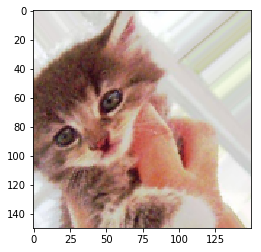

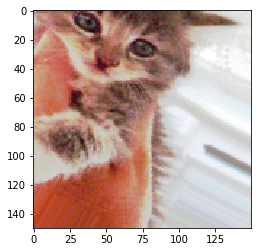

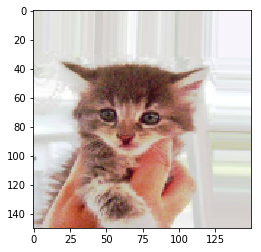

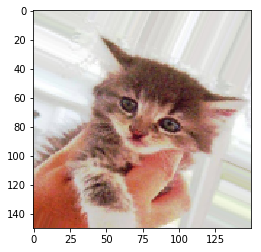

In [32]:
# Generates batches of randomly transformed images.
# Loops indefinitely so we need to break the loop at some point
i = 0
for batch in augment_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    
    # Must break the control sequence because datagen will produce images indefinitely
    if i % 4 == 0:
        break

plt.show()

All new images added to the training set will be remixed/mixtures of the original training images, and thus will be correlated with them. Thus while data augmentation can help with overfitting, for best results we will also add a dropout layer to the model, right before the densely connected classifier.

## Model 2 - Dropout and Augmentation

In [ ]:
from tensorflow.keras import models, layers

In [38]:
model = models.Sequential()

# First conv/pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second conv/pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third conv/pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Final conv/pooling
model.add(layers.Conv2D(128, (3, 3,), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers before input to densely connected classifier
model.add(layers.Flatten())

# Add a dropout layer - 50% of its outputs will randomly go to 0
# Helps minimise noise due to random associations in the ConvNet data
model.add(layers.Dropout(0.5))

# Create a densely connected classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compiling the Model

In [42]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['acc'])

### Configuring augmentation data generators for training the model

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [44]:
# Validation data should not be augmented - just rescaled
test_datagen = ImageDataGenerator(rescale= 1./255)

In [45]:
# Linking the training data generator to the right directory and params
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.


In [49]:
# Doing the same for the validation generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


### Training the Model with Augmentation

In [ ]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

### Saving the trained model

In [47]:
model.save('cats_and_dogs_small_2.h5')

### Plotting the training results again

In [48]:
# Extracting metrics from history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Independent variable for our plots
epochs = range(1, len(acc) + 1)

NameError: name 'history' is not defined

In [ ]:
# Plotting the accuracy
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Data Augmented, Dropout')
plt.legend(); plt.grid(True)

In [ ]:
# Plotting the loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss - Data Augmented, Dropout')
plt.legend(); plt.grid(True)
plt.show() 